In [3]:
import pandas as pd
from pycaret.classification import *
import joblib

In [2]:
data_train = pd.read_csv('new_train_treated.csv')
data_test = pd.read_csv('new_test_treated.csv')

---

In [3]:
classification = setup(data = data_train, target = 'target',
                        ignore_features=['customer_ID'],
                        feature_selection=True,
                        remove_multicollinearity=True,
                        n_jobs=-1,
                        use_gpu=True) 

,Description,Value
0,session_id,2162
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(458913, 152)"
5,Missing Values,False
6,Numeric Features,150
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
compare_models(cross_validation=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8896,0.9510,0.7864,0.7862,0.7863,0.7119,0.7119,11.7400
gbc,Gradient Boosting Classifier,0.8846,0.9467,0.7740,0.7778,0.7759,0.6982,0.6982,1413.0500
rf,Random Forest Classifier,0.8830,0.9444,0.7629,0.7792,0.7710,0.6924,0.6925,336.2900
et,Extra Trees Classifier,0.8825,0.9441,0.7615,0.7785,0.7699,0.6910,0.6911,45.5500
lr,Logistic Regression,0.8821,0.9446,0.7454,0.7868,0.7656,0.6869,0.6874,67.5600
lda,Linear Discriminant Analysis,0.8800,0.9427,0.7447,0.7806,0.7622,0.6821,0.6824,9.5800
ridge,Ridge Classifier,0.8792,0.8275,0.7206,0.7927,0.7549,0.6750,0.6764,4.5000
ada,Ada Boost Classifier,0.8790,0.9418,0.7471,0.7758,0.7612,0.6802,0.6804,455.2000
svm,SVM - Linear Kernel,0.8752,0.8333,0.7466,0.7644,0.7554,0.6716,0.6717,8.3800
nb,Naive Bayes,0.8528,0.9120,0.7017,0.7209,0.7111,0.6124,0.6125,1.4400


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2162, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
print(best_model) #AUC

In [5]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8902,0.9510,0.7887,0.7881,0.7884,0.7143,0.7143
1,0.8887,0.9514,0.7864,0.7848,0.7856,0.7104,0.7104
2,0.8908,0.9515,0.7911,0.7883,0.7897,0.7159,0.7159
3,0.8920,0.9519,0.7887,0.7935,0.7911,0.7183,0.7183
4,0.8901,0.9528,0.7912,0.7861,0.7886,0.7143,0.7143
5,0.8894,0.9506,0.7883,0.7858,0.7870,0.7123,0.7123
6,0.8884,0.9508,0.7816,0.7865,0.7841,0.7088,0.7088
7,0.8906,0.9524,0.7936,0.7863,0.7900,0.7160,0.7160
8,0.8872,0.9500,0.7871,0.7800,0.7836,0.7073,0.7073


In [6]:
final_lgbm = finalize_model(lgbm)

In [7]:
save_model(final_lgbm,'modelo_lgbm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['customer_ID'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_sample

In [14]:
tuned_model = tune_model(lgbm, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8910,0.9521,0.7899,0.7898,0.7898,0.7163,0.7163
1,0.8910,0.9529,0.7931,0.7878,0.7904,0.7168,0.7168
2,0.8929,0.9530,0.7948,0.7926,0.7937,0.7214,0.7214
3,0.8921,0.9532,0.7871,0.7947,0.7909,0.7182,0.7182
4,0.8924,0.9543,0.7956,0.7906,0.7931,0.7204,0.7204
5,0.8912,0.9516,0.7905,0.7899,0.7902,0.7167,0.7167
6,0.8902,0.9521,0.7875,0.7886,0.7881,0.7139,0.7139
7,0.8934,0.9536,0.7970,0.7928,0.7949,0.7228,0.7228
8,0.8894,0.9515,0.7921,0.7838,0.7879,0.7131,0.7131


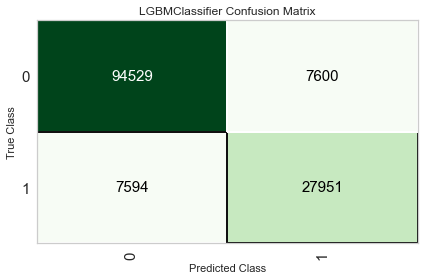

In [8]:
plot_model(lgbm,plot='confusion_matrix')

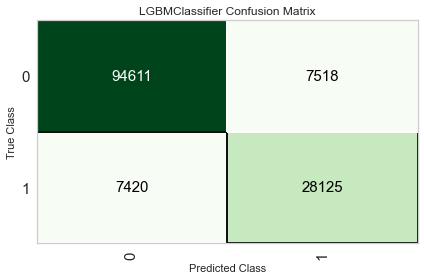

In [15]:
plot_model(tuned_model,plot='confusion_matrix')

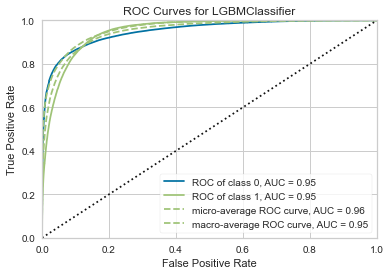

In [12]:
plot_model(lgbm, plot='auc')

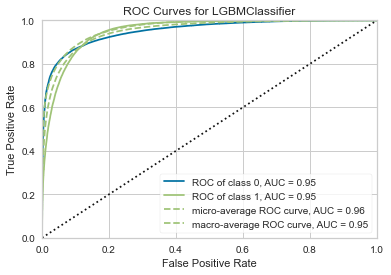

In [16]:
plot_model(tuned_model, plot='auc')

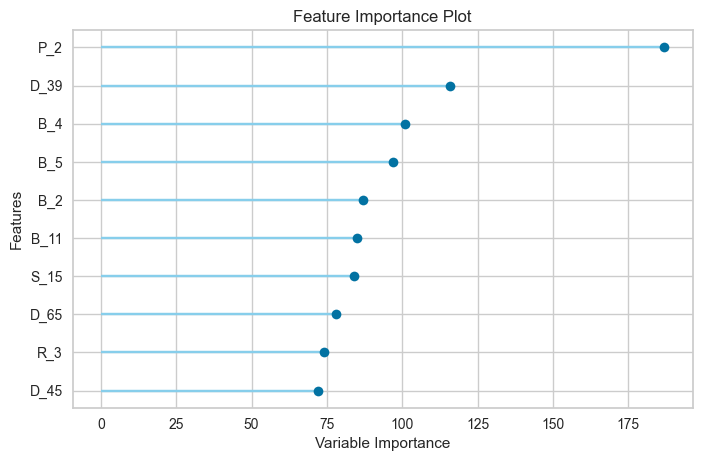

In [13]:
plot_model(lgbm, plot='feature')

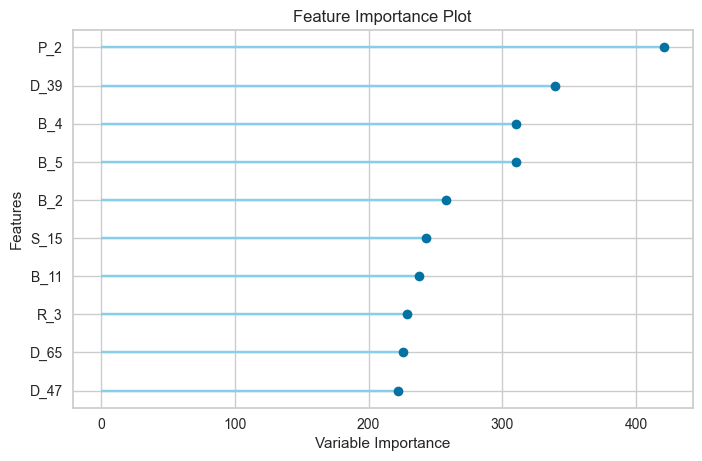

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will b

In [17]:
plot_model(tuned_model, plot='feature')

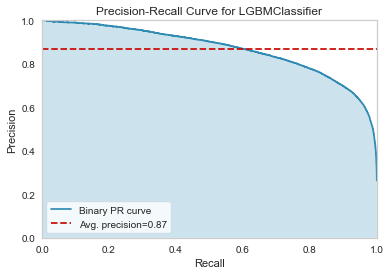

In [18]:
plot_model(lgbm, plot='pr')

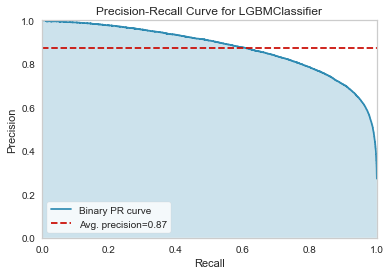

In [19]:
plot_model(tuned_model, plot='pr')

In [20]:
final_tuned_model = finalize_model(tuned_model)

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will b

In [21]:
save_model(final_tuned_model,'modelo_lgbm_tuned')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['customer_ID'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.9,
                                 importance_type='split', learning_rate=0.05,
                                 max_dep

In [5]:
pipeline = joblib.load('modelo_lgbm_tuned.pkl')

In [10]:
pipeline.predict_proba(data_test)

array([[0.95769291, 0.04230709],
       [0.99840608, 0.00159392],
       [0.98494172, 0.01505828],
       ...,
       [0.35843403, 0.64156597],
       [0.53653924, 0.46346076],
       [0.90837777, 0.09162223]])

In [11]:
pipeline.predict_proba(data_test)[:,1]

array([0.04230709, 0.00159392, 0.01505828, ..., 0.64156597, 0.46346076,
       0.09162223])

In [8]:
lgbm_pred = predict_model(pipeline, data=data_test)

In [18]:
lgbm_pred['prediction'] = pipeline.predict_proba(data_test)[:,1]

In [19]:
lgbm_pred.head()

,customer_ID,P_2,D_39,B_1,B_2,R_1,D_41,B_3,D_44,B_4,D_45,B_5,R_2,D_47,D_48,B_6,B_7,B_8,D_51,B_9,R_3,D_52,P_3,B_10,S_5,B_11,S_6,D_54,R_4,B_12,S_8,D_55,B_13,R_5,D_58,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_65,B_16,B_18,B_19,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,B_25,B_26,D_78,D_79,R_8,S_16,D_80,R_10,R_11,B_27,D_81,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_30,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_107,B_36,B_37,R_27,B_38,D_109,D_112,B_40,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,Label,Score,default_prob,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.601387,0.069758,0.013925,0.898289,0.005773,0.002635,0.009732,0.007083,0.132557,0.011955,0.047263,0.005000,0.479550,0.578279,0.218059,0.283370,1.006641,0.041620,0.003733,0.104659,0.117639,0.591933,0.037069,0.006742,0.006187,0.227071,1.005194,0.005101,0.082867,0.271142,0.317072,0.054207,0.004464,0.377217,0.018828,0.412407,0.042616,0.597552,0.020536,1.608184,0.035462,0.004591,0.003792,0.590665,0.004468,0.005869,6.000000,0.136646,0.003876,0.601419,0.007769,0.006233,0.004888,0.004415,0.072740,0.004783,0.459957,0.254266,0.961646,0.219199,0.204130,0.005203,0.004423,0.004567,0.005206,0.004126,0.004534,0.006230,0.005912,0.005002,0.005161,0.005572,0.005720,0.004031,0.005725,1.004421,0.145220,0.004435,0.005146,0.004547,0.003600,0.004711,0.004303,0.000000,0.006010,0.007949,0.004437,0.003736,1.0,0.006266,0.003948,0.005471,0.005406,0.004758,0.003851,1.005949,0.004934,0.004632,0.005964,0.002312,0.116208,0.004286,0.005423,0.006416,0.005308,0.004607,0.962658,0.136015,0.949735,0.973917,0.038056,0.005494,0.004177,0.005923,0.002802,0.004009,0.013483,1.006624,1.777778,0.004123,1.004091,0.368253,0.005696,0.0,0.252104,0.0,-1.000000,0.246912,0.247668,1.000000,0.196751,0.145303,0.003728,0.008423,0.005669,0.000000,0.005166,0.006024,0.006681,0.006821,0.005501,0.004620,0.004254,0.005292,0.004483,0.003996,0.005657,0.005480,0.005730,0.005271,0,0.9577,0.042307,0.042307
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0.862166,0.154252,0.052342,1.003704,0.006147,0.003970,0.006160,0.004452,0.061213,0.088032,0.101462,0.005472,0.351356,0.070145,0.195901,0.033406,1.004206,0.158422,0.081637,0.005181,0.148449,0.553269,0.298050,0.022617,0.035716,0.004829,1.004121,0.005043,0.043231,0.840346,0.063459,0.099541,0.003861,0.005272,0.034238,0.583729,0.507825,0.070053,0.004710,0.173136,0.328514,0.004693,0.051158,1.005336,0.004885,0.004922,6.000000,0.214804,0.003863,0.349129,0.006818,0.003705,0.004317,0.004693,0.008718,0.005635,0.106175,0.022771,0.005996,0.004456,0.004865,0.005254,0.005995,0.058109,0.002775,0.004939,0.005173,0.004349,0.005592,0.004409,0.004744,0.006061,0.005269,0.006148,0.005137,1.005026,0.033780,0.005120,0.004638,0.005254,0.004815,0.005833,0.003957,0.000000,0.004770,0.006296,0.005525,0.003989,1.0,0.005619,0.004286,0.003917,0.005877,0.005485,0.004694,1.003672,0.004422,0.004727,0.005230,0.235882,0.006149,0.004717,0.004236,0.005082,0.004663,0.468582,0.928724,0.135646,0.920595,0.973939,0.006963,0.004841,0.003439,0.005631,0.004473,0.005196,0.049217,1.004561,2.230769,0.005269,1.005064,0.025251,0.003922,1.0,0.309216,0.0,3.000000,0.303904,0.303837,0.000000,0.842254,0.576952,0.003205,0.641199,0.004250,1.000000,0.006148,1.003930,0.004997,0.005565,0.005076,0.004196,0.004032,0.005449,0.006455,0.004865,0.004814,0.005762,0.005329,0.005466,0,0.9984,0.001594,0.001594
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0.748955,0.181814,0.012762,0.901266,0.005765,0.005222,0.008552,0.005228,0.227632,0.053784,0.020789,0.004970,0.190731,0.340703,0.141160,0.059383,1.004163,0.005435,0.005599,0.043429,0.230020,0.670820,0.192089,0.007970,0.009048,0.004404,1.004978,0.003984,0.056018,0.336215,0.282046,0.048400,0.005122,0.131883,0.014

In [20]:
lgbm_pred_submit = lgbm_pred.filter(['customer_ID','prediction'])
lgbm_pred_submit

,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.042307
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0.001594
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0.015058
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0.548552
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0.821761
...,...,...
924616,ffff952c631f2c911b8a2a8ca56ea6e656309a83d2f64c...,0.019940
924617,ffffcf5df59e5e0bba2a5ac4578a34e2b5aa64a1546cd3...,0.665664
924618,ffffd61f098cc056dbd7d2a21380c4804bbfe60856f475...,0.641566
924619,ffffddef1fc3643ea179c93245b68dca0f36941cd83977...,0.463461


In [21]:
lgbm_pred_submit.to_csv('model_v1.csv',index=False)